In [1]:
#import numpy as np
#import pandas as pd
#import os 
#from ggplot import *
#from  sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split, cross_val_score 
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#import seaborn as sns
#import matplotlib.pyplot as plt
#from fancyimpute import KNN

C:\Users\Owner\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Owner\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir('C:/chann/ds/edwisor/employee absenteeism')
os.getcwd()

'C:\\chann\\ds\\edwisor\\employee absenteeism'

In [3]:
data=pd.read_excel('Absenteeism_at_work_Project.xls')

In [4]:
data.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0


In [5]:
data.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [6]:
data['Reason for absence'].describe()

count    737.000000
mean      19.188602
std        8.437493
min        0.000000
25%       13.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64

In [7]:
# Imputing 0 to 26 (Unjustified absence)
data['Reason for absence'][data['Reason for absence']==0]=26

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [9]:
data['Reason for absence']=data['Reason for absence'].astype(object)
data['Month of absence']=data['Month of absence'].astype(object)
data['Day of the week']=data['Day of the week'].astype(object)
data['Seasons']=data['Seasons'].astype(object)
data['Disciplinary failure']=data['Disciplinary failure'].astype(object)
data['Son']=data['Son'].astype(object)
data['Pet']=data['Pet'].astype(object)
data.dtypes

ID                                   int64
Reason for absence                  object
Month of absence                    object
Day of the week                     object
Seasons                             object
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure                object
Education                          float64
Son                                 object
Social drinker                     float64
Social smoker                      float64
Pet                                 object
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [10]:
data.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Education,Social drinker,Social smoker,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,730.000000,737.000000,736.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,1.295890,0.567164,0.073370,79.063599,172.152893,26.684062,6.977716
std,11.021247,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,0.676965,0.495805,0.260919,12.868630,6.081065,4.292819,13.476962
min,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,1.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,1.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,1.000000,1.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,1.000000,1.000000,0.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,4.000000,1.000000,1.000000,108.000000,196.000000,38.000000,120.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null object
Month of absence                   739 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null object
Education                          730 non-null float64
Son                                734 non-null object
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet    

In [12]:
print(data.shape)
data=data.loc[data['Absenteeism time in hours']!=0,:]
data.shape

(740, 21)


(704, 21)

In [13]:
data.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

In [14]:

cont_vars= ['ID','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

cat_vars = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [15]:
data['ID'][data['Social drinker'].isnull()]

78    10
85    14
91    17
Name: ID, dtype: int64

In [16]:
for i in [10,14,17]:
    data['Social drinker'][(data['ID']==i) & (data['Social drinker'].isnull())]=data['Social drinker'][data['ID']==i].mode()[0]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
data['ID'][data['Social smoker'].isnull()]

114    34
267     1
272    11
275    15
Name: ID, dtype: int64

In [18]:
for i in [34,1,11,15]:
    data['Social smoker'][(data['ID']==i) & (data['Social smoker'].isnull())]=data['Social smoker'][data['ID']==i].mode()[0]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
data['ID'][data['Education'].isnull()]

77     11
109    10
110    34
115    34
116    14
127    34
128    34
131    34
268    10
274    24
Name: ID, dtype: int64

In [20]:
for i in [11,10,34,14,24]:
    data['Education'][(data['ID']==i) & (data['Education'].isnull())]=data['Education'][data['ID']==i].mode()[0]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
data.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           0
Son                                 6
Social drinker                      0
Social smoker                       0
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

In [22]:
data['Education']=data['Education'].astype(object)
data['Social drinker']=data['Social drinker'].astype(object)
data['Social smoker']=data['Social smoker'].astype(object)
data.dtypes

ID                                   int64
Reason for absence                  object
Month of absence                    object
Day of the week                     object
Seasons                             object
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure                object
Education                           object
Son                                 object
Social drinker                      object
Social smoker                       object
Pet                                 object
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [23]:
 # !pip install fancyimpute

In [24]:
#Knn imputation
#data= pd.DataFrame(KNN(k = 5).fit_transform(data), columns =data.columns)

In [25]:
#import sys
#sys.version

In [26]:
# Reading data after imputing NA values by KNN method in r
data=pd.read_csv('d1.csv')
data.columns=['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']
data.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work      int64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [27]:
data['Reason for absence']=data['Reason for absence'].astype(object)
data['Month of absence']=data['Month of absence'].astype(object)
data['Day of the week']=data['Day of the week'].astype(object)
data['Seasons']=data['Seasons'].astype(object)
data['Disciplinary failure']=data['Disciplinary failure'].astype(object)
data['Son']=data['Son'].astype(object)
data['Pet']=data['Pet'].astype(object)
data['Education']=data['Education'].astype(object)
data['Social drinker']=data['Social drinker'].astype(object)
data['Social smoker']=data['Social smoker'].astype(object)
data.dtypes

ID                                   int64
Reason for absence                  object
Month of absence                    object
Day of the week                     object
Seasons                             object
Transportation expense             float64
Distance from Residence to Work      int64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure                object
Education                           object
Son                                 object
Social drinker                      object
Social smoker                       object
Pet                                 object
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [28]:
data.isnull().sum()
data.shape

(704, 21)

In [29]:
t=0
for i in cont_vars:
    mean =data[i].mean()
    sd = data[i].std()
    t=t+((data[i] < mean - 3*sd) | (data[i] > mean + 3*sd)).sum()
t   # 72 outliers

72

In [30]:
# let's replace outliers with NA and impute them with median
for i in cont_vars:
    mean =data[i].mean()
    sd = data[i].std()
    data[i][((data[i] < mean - 3*sd) | (data[i] > mean + 3*sd))]=np.NAN
data.isnull().sum()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        5
Age                                 8
Work load Average/day               0
Hit target                         15
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                             29
Body mass index                     0
Absenteeism time in hours          15
dtype: int64

In [31]:
data['ID'][data['Service time'].isnull()]

225    32
481    32
484    32
487    32
547    32
Name: ID, dtype: int64

In [32]:
data['Service time'][(data['ID']==32) & (data['Service time'].isnull())]=data['Service time'].median()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
data['ID'][data['Age'].isnull()]
data['Age'][(data['ID']==9) & (data['Age'].isnull())]=data['Age'].median()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
data['ID'][data['Height'].isnull()]
for i in [14,30]:
    data['Height'][(data['ID']==i) & (data['Height'].isnull())]=data['Height'].median()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
for i in ['Hit target','Absenteeism time in hours']:
        data[i][data[i].isnull()]=data[i].mode()[0]


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
data['Absenteeism time in hours']=data['Absenteeism time in hours'].round()

In [37]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289.0,36,13.0,33.0,239554.0,...,0,1,2,1,0,1,90.0,172.0,30.0,4.0
1,3,23,7,4,1,179.0,51,18.0,38.0,239554.0,...,0,1,0,1,0,0,89.0,170.0,31.0,2.0
2,7,7,7,5,1,279.0,5,14.0,39.0,239554.0,...,0,1,2,1,1,0,68.0,168.0,24.0,4.0
3,11,23,7,5,1,289.0,36,13.0,33.0,239554.0,...,0,1,2,1,0,1,90.0,172.0,30.0,2.0
4,3,23,7,6,1,179.0,51,18.0,38.0,239554.0,...,0,1,0,1,0,0,89.0,170.0,31.0,3.0


In [38]:
data['Reason for absence']=data['Reason for absence'].astype(object)
data['Month of absence']=data['Month of absence'].astype(object)
data['Day of the week']=data['Day of the week'].astype(object)
data['Seasons']=data['Seasons'].astype(object)
data['Disciplinary failure']=data['Disciplinary failure'].astype(object)
data['Son']=data['Son'].astype(object)
data['Pet']=data['Pet'].astype(object)
data['Education']=data['Education'].astype(object)
data['Social drinker']=data['Social drinker'].astype(object)
data['Social smoker']=data['Social smoker'].astype(object)
data.dtypes

ID                                   int64
Reason for absence                  object
Month of absence                    object
Day of the week                     object
Seasons                             object
Transportation expense             float64
Distance from Residence to Work      int64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure                object
Education                           object
Son                                 object
Social drinker                      object
Social smoker                       object
Pet                                 object
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [39]:
#PROBLEM1: What changes company should bring to reduce number of absenteeism ?
#Let's visualize 
def plot(x,y):
    data1 = data.groupby(x)[y].sum()
    data1 = data1*100/sum(data1)
    data1=pd.DataFrame(data1)
    data1=data1.round()
    data1['t']=data1.index
    data1.reset_index
    sns.boxplot(x='t',y=y,data=data1)

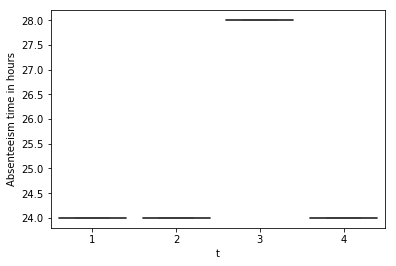

In [40]:
#Seasons (summer (1), autumn (2), winter (3), spring (4))
plot('Seasons','Absenteeism time in hours')

Employees tend to take leave in winter season more than 25 % of time

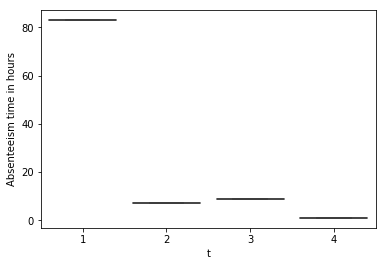

In [41]:
#Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)
plot('Education','Absenteeism time in hours')

employees whose education background is high school take 80 percent of absenteeism time in hours 

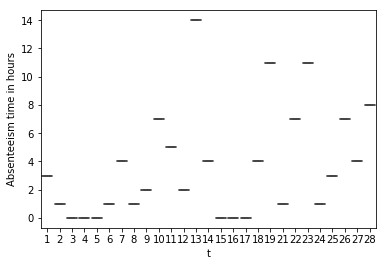

In [42]:
plot('Reason for absence','Absenteeism time in hours')

 23 =>  medical consultation   (Employees with this reason are absent for more than 12.5% of total time)
 13  =>  Diseases of the musculoskeletal system and connective tissue   (Employees with this reason are absent for 10% of total time)
 28 => dental consultation (28) (Employees with this reason are absent for around 9% of total time)
 19 =>Injury, poisoning and certain other consequences of external causes 
 22  =>  7 categories without (CID) patient follow-up  (Employees with this reason are absent for around 8% of total time)
 26 => unjustified absence (26) (Employees with this reason are absent for around 8% of total time)
 27,10,11,18,1,14,25 => between 2.5 to 5 percent

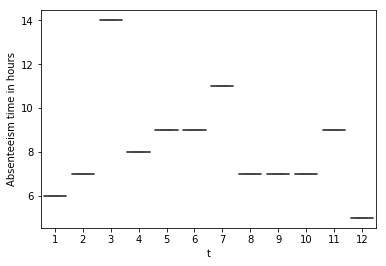

In [43]:
plot('Month of absence','Absenteeism time in hours')

3 => march => employee in month of march tend to absent of about 13% of time
7=> july => employee in month of march tend to absent of about 11% of time

#PROBLEM1: What changes company should bring to reduce number of absenteeism ?

1.Company should provide hygienic working conditions (Providing safety and health measures).
2.Service time should be around  12 hours or less than that. (High workload leads to high absenteeism time)
3. Providing leave facility based on employee's needs and organizational requirement
4.Events can be organised in month of march and july .So there is a good chance to reduce absenteeism
5.To reduce absenteeism it's better not to hire people who have diseases of musculoskelatal system and connective tissue complaints




In [44]:
#Time series analysis
emp = data.groupby('Month of absence')['Absenteeism time in hours'].sum()
emp=emp.reset_index()
emp.columns=['Month of absence','avg_loss']
emp

,Month of absence,avg_loss
0,1,222.0
1,2,297.0
2,3,564.0
3,4,322.0
4,5,341.0
5,6,343.0
6,7,444.0
7,8,286.0
8,9,293.0
9,10,295.0


In [45]:
# data is recorded from july 2007 to july 2010 
 #to get loss per month ,we divide absenteeism time in hours by 3..july should be divided by 4.

In [46]:
emp['avg_loss'] = emp['avg_loss']/3
emp

,Month of absence,avg_loss
0,1,74.000000
1,2,99.000000
2,3,188.000000
3,4,107.333333
4,5,113.666667
5,6,114.333333
6,7,148.000000
7,8,95.333333
8,9,97.666667
9,10,98.333333


In [47]:
emp.loc[6,'avg_loss']=emp.loc[6,'avg_loss']*3/4

In [48]:
import datetime as dt
emp=emp.astype(int)
emp

,Month of absence,avg_loss
0,1,74
1,2,99
2,3,188
3,4,107
4,5,113
5,6,114
6,7,111
7,8,95
8,9,97
9,10,98


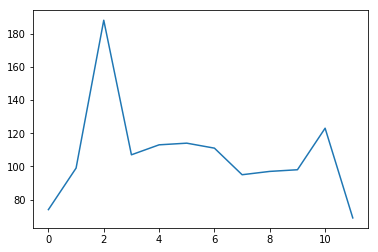

In [49]:
ts=emp.avg_loss
plt.plot(ts)

In [50]:
###### checking if the time series is stationary series
from statsmodels.tsa.stattools import adfuller
ttest = adfuller(ts,autolag='AIC')
outp = pd.Series(ttest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ttest[4].items():
    outp['Critical Value (%s)'%key] = value
outp

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64

 p>0.05 that means data is not stationary

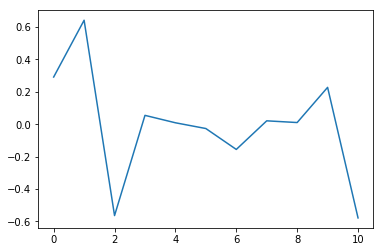

In [51]:
plt.plot(np.diff(np.log(ts)))


In [52]:
ts=emp.set_index('Month of absence')
ts

,avg_loss
Month of absence,
1,74
2,99
3,188
4,107
5,113
6,114
7,111
8,95
9,97


p< 0.05 that means we can reject null hypothesis .
Therefore the diff(log(ts)) data is stationary

In [53]:
# Let's build ARIMA model 
from statsmodels.tsa.arima_model import ARIMA

In [54]:
np.diff(np.log(ts).values)


array([], shape=(12, 0), dtype=float64)

In [55]:
# Now, let's predict the losses in 2011
model = ARIMA(np.log(ts.values), order=(3,0,0))
m=model.fit()
m

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [56]:
ts_pred= m.predict(start=12,end=24)

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [57]:
ts_pred

array([4.67349651, 4.82719848, 4.55624606, 4.63329001, 4.73490997,
       4.64378323, 4.64078422, 4.68891914, 4.66513548, 4.65323637,
       4.67161606, 4.66797543, 4.66055222])

In [58]:
predd=2.718282**(ts_pred)

#2. How much losses every month can we project in 2011 if same trend of absenteeism continues?

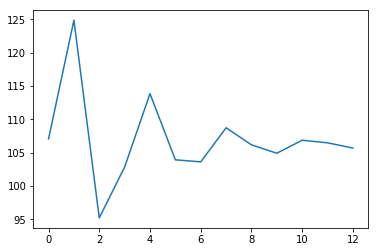

In [59]:
plt.plot(predd)

# Model development

In [60]:
y=data['Absenteeism time in hours']
x=data.drop(columns=['Weight','Absenteeism time in hours'])

In [61]:
x=pd.get_dummies(x,columns=cat_vars)
x.shape

(704, 78)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7, test_size = .2)

In [63]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
y_pred = lr.predict(x_test)
error = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
error

6.03185168102658

In [65]:
randomForest = RandomForestRegressor(random_state=8)
randomForest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=8, verbose=0, warm_start=False)

In [66]:
randomForestPredict = randomForest.predict(x_test)
randomForest_mse = mean_squared_error(y_test, randomForestPredict)
randomForestMSE = np.sqrt(randomForest_mse)
randomForestMSE

5.903988147356771

In [67]:
#We fix lr_model to predict Absenteeism timein hours fornew data